# Plotly

Plotly - библиотека для визуализации данных, состоящая из нескольких частей:

- Front-End на JS

- Back-End на Python (за основу взята библиотека Seaborn)

- Back-End на R

Документация - https://plotly.com/graphing-libraries/

Так же на базе plotly и веб-сервера Flask существует специальная библиотека для создания дашбордов Dash - https://dash.plotly.com/

- **Plotly - бесплатная библиотека, которую вы можете использовать в коммерческих целях**

- Plotly работает offline

- Plotly позволяет строить **интерактивные** визуализации

Т.е. с помощью Plotly можно как изучать какие-то данные "на лету" (не перестраивая график в matplotlib, изменяя масштаб, включая/выключая какие-то данные), так и построить полноценный интерактивный отчёт (дашборд).


Для начала необходимо установить библиотеку, т.к. она не входит ни в стандартный пакет, ни в Anaconda. Для этого рекомендуется использовать pip:

<code>pip install plotly</code>

Если вы используете Jupyter Notebook, то можно использовать мэджик "!", поставив данный символ перед командой:

<code>!pip install plotly</code>

In [1]:
!pip install plotly

Перед началом работы необходимо импортировать модуль. В разных частях урока для разных задач нам понадобятся как основной модуль, так и один из его подмодулей, поэтому полный набор инструкций импорта у нас:


<code>import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
</code>

Так же нам понадобятся библиотеки Pandas и Numpy для работы с сырыми данными

In [52]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

## Линейный график

Начнём с простой задачи построения графика по точкам. 

Используем функцию $f(x) = x^3$

Сперва поступим совсем просто и "в лоб":

- Создадим график с помощью функции scatter из подмодуля plotly.express (внутрь передадим 2 списка точек: координаты X и Y)

- Тут же "покажем" его с помозью метода show()

Обратите внимание - график интерактивный, если навести на него курсор, то можно его приближать и удалять, выделять участки, по наведению курсора на точку получать подробную информацию, возвращать картинку в исходное положение, а при необходимости "скриншотить" и сохранять как файл.


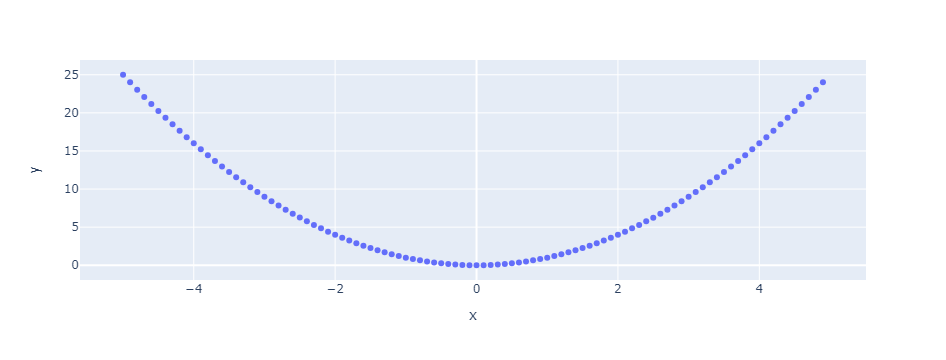

In [56]:
x = np.arange(-5, 5, 0.1)
def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()

Более читабельно и правильно записать тот же в код в следующем виде:

<code>fig = px.scatter(x=x, y=f(x))
fig.show()</code>

- Создаём фигуру
- Рисуем график
- Показываем фигуру

2 строчки и готовый результат. Т.к. мы используем Express. Быстро и просто.

Так же сразу выведем фигуру для показа с помощью метода show().

*В отличие от Matplotlib отдельные объекты осей не создаются, хотя мы с ними ещё столкнёмся, когда захотим построить несколько графиков вместе*

<code>fig = go.Figure()
#Здесь будет код
fig.show()</code>

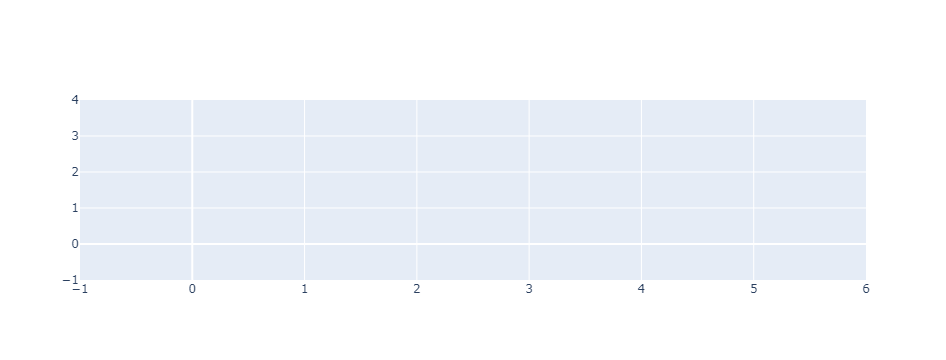

In [57]:
fig = go.Figure()
#Здесь будет код
fig.show()

Как видим, пока пусто.

Чтобы добавить что на график нам понадобится метод фигуры add_trace.

<code>fig.add_trace(ТУТ_ТО_ЧТО_ХОТИМ_ПЕРЕДАТЬ_ДЛЯ_ОТОБРАЖЕНИЯ_И_ГДЕ)</code>

Но ЧТО мы хотим нарисовать? График по точкам. График мы уже рисовали с помощью Scatter в Экспрессе, у Объектов есть свой Scatter, давайте глянем что он делает:

<code>go.Scatter(x=x, y=f(x))</code>

In [58]:
go.Scatter(x=x, y=f(x))

Scatter({
    'x': array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
                -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
                -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
                -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
                -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
                -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
                -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
                -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
                -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
                -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
                -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
                -6.00000000e-01, -5.00000000e-01, -4.00000000e-01,

А теперь объединим:
    
<code>fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()</code>

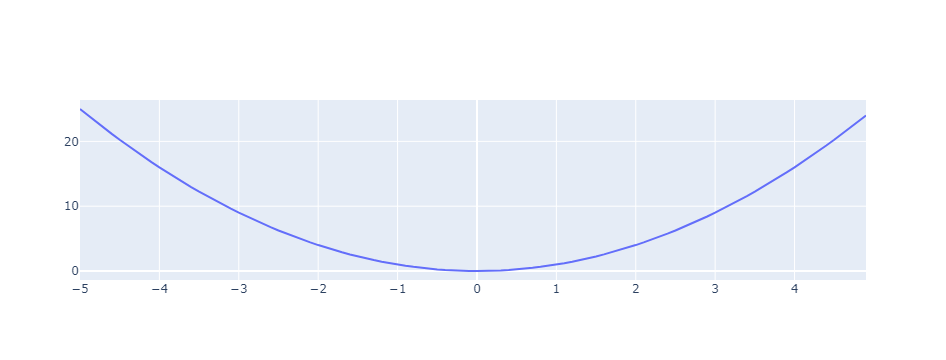

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()

Как видим, отличия не только в коде, но и в результате - получилась гладкая кривая.

Кроме того, такой способ позволит нам нанести на график столько кривых, сколько мы хотим:
    
    
<code>fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show()</code>

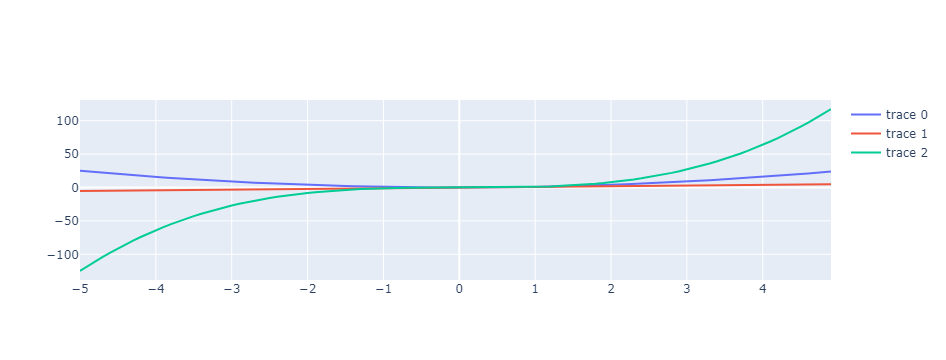

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.add_trace(go.Scatter(x=x, y=x*f(x)))
fig.show()

Погодите, что это такое? Справа появилась ещё и легенда!

Впрочем, логично, пока график был один, зачем нам легенда?

Но магия Plotly тут не заканчивается. Нажмите на любую из подписей в легенде и соответствующий график исчезнет, а надпись станет более бледной. Вернуть их позволит повторный клик.

**Подписи графиков**

Добавим атрибут name, в который передадим строку с именем графика, которое мы хотим отображать в легенде.

Plotly поддерживает LATEX в подписях (аналогично matplotlib через использование $$ с обеих сторон).

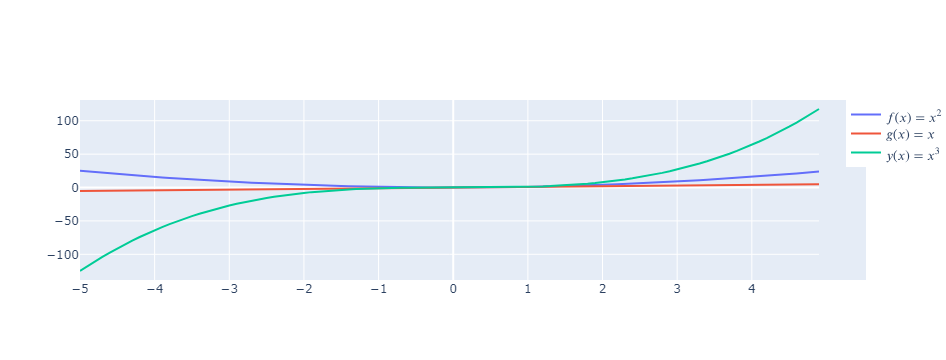

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.add_trace(go.Scatter(x=x, y=x*f(x), name='$$y(x)=x^3$$'))
fig.show()

К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в "сыром" виде, а не в LATEX.

Победить это можно, если использовать HTML разметку в подписях. В данном примере я буду использовать тег <a href="http://htmlbook.ru/html/sup">sup</a>. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.

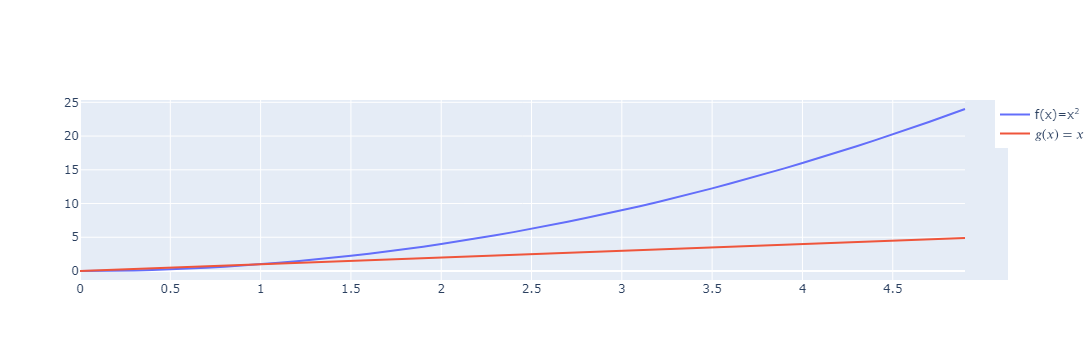

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

С увеличением длины подписи графика, легенда начала наезжать на график. Мне это не нравится, поэтому перенесём легенду вниз.

Для этого применим к фигуре метод update_layout, у которого нас интересует атрибут legend_orientation
<code>fig.update_layout(legend_orientation="h")</code>

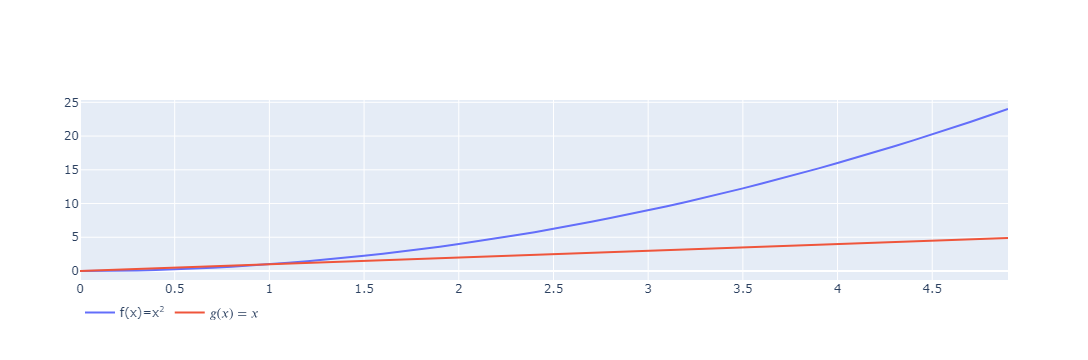

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h")
fig.show()

Хорошо, но слишком большая часть рабочего пространства ноутбука не используется. Особенно это заметно сверху - большой отступ сверху до поля графика.

По умолчанию поля графика имеют отступ 20 пикселей. Мы можем задать свои значения отступам с помощью update_layout, у которого есть атрибут margin, принимающий словарь из отступов:

- l - отступ слева
- r - отступ справа
- t - отступ сверху
- b - отступ снизу

Зададим везде нулевые отступы
<code>fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))</code>

*update_layout можно применять последовательно несколько раз, либо можно передать все аргументы в одну функцию (мы сделаем именно так)*

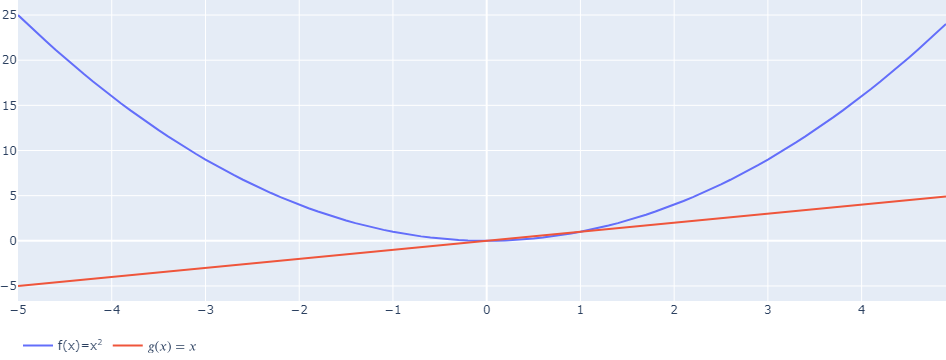

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Поскольку подписи в легенде короткие, мне не нравится, что они расположены слева. Я бы предпочёл выровнять их по центру.

Для этого можно использовать у update_layout атрибут legend, куда передать словарь с координатами для сдвига (*сдвиг может быть и по вертикали, но мы используем только горизонталь*).

Сдвиг задаётся в долях от ширины всей фигуры, но важно помнить, что сдвигается левый край легенды. Т.е. если мы укажем 0.5 (*50% ширины*), то надпись будет на самом деле чуть сдвинута вправо.

*Т.к. реальная ширина зависит от особенностей вашего экрана, браузера, шрифтов и т.п., то этот параметр часто приходится подгонять. Лично у меня для этого примера неплохо работает 0.43.*

Чтобы не шаманить с шириной, можно легенду относительно точки сдвига с помощью аргумента xanchor.

В итоге для легенды мы получим такой словарь:

<code>legend=dict(x=.5, xanchor="center")</code>

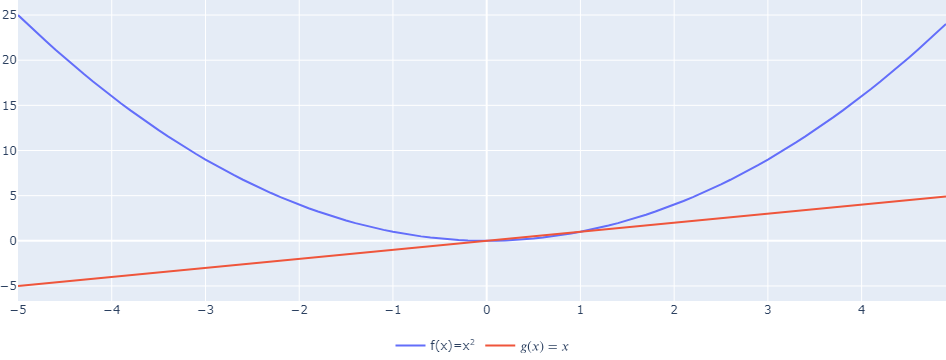

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Стоит сразу задать подписи к осям и графику в целом. Для этого нам вновь понадобится update_layout, у которого добавится 3 новых аргумента:

<code>title="Plot Title",
xaxis_title="x Axis Title",
yaxis_title="y Axis Title",</code>
    
*Следует заметить, что сдвиги, которые мы задали ранее могут негавтивно сказаться на читаемости подписей (так заголовок графика вообще вытесняется из области видимости, поэтому я увеличу отступ сверху с 0 до 30 пикселей*

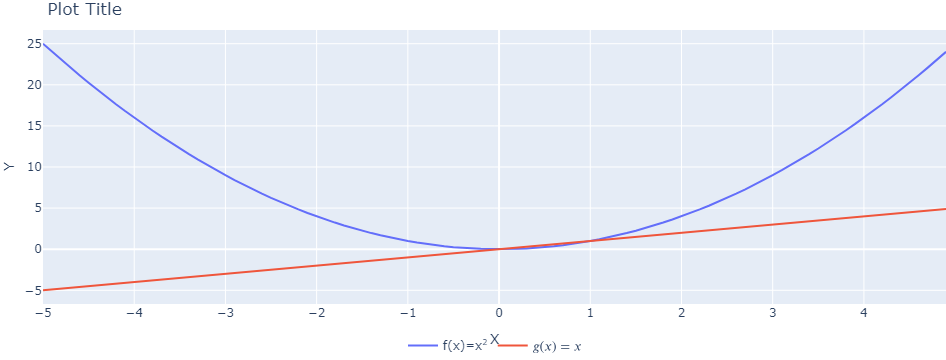

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="X",
                  yaxis_title="Y",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Вернёмся к самим графикам, и вспомним, что они состоят из точек. Выделим их с помощью атрибута mode у самих объектов Scatter.

Используем разные варианты выделения для демонстрации:

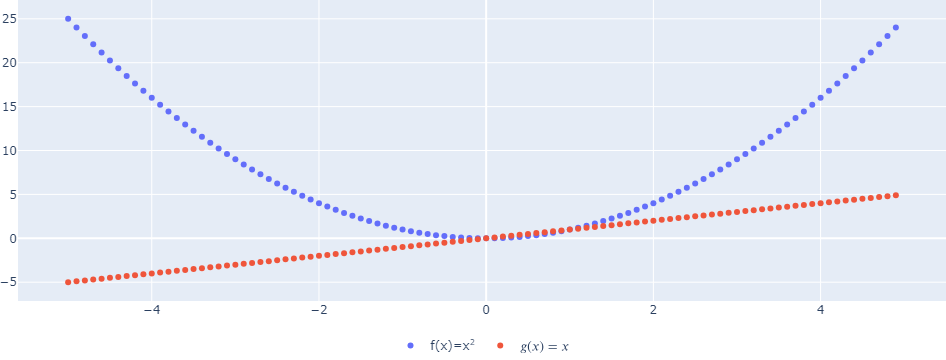

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Теперь особенно заметно, что LATEX в функции $g(x)=x$ отображается некорректно при наведении курсора мыши на точки.

Давайте скроем эту информацию.

Зададим для всех графиков с помощью метода update_traces поведение при наведении. Это регулирует атрибут hoverinfo, в который передаётся маска из имён атрибутов, например, "x+y" - это только информация о значениях аргумента и функции:

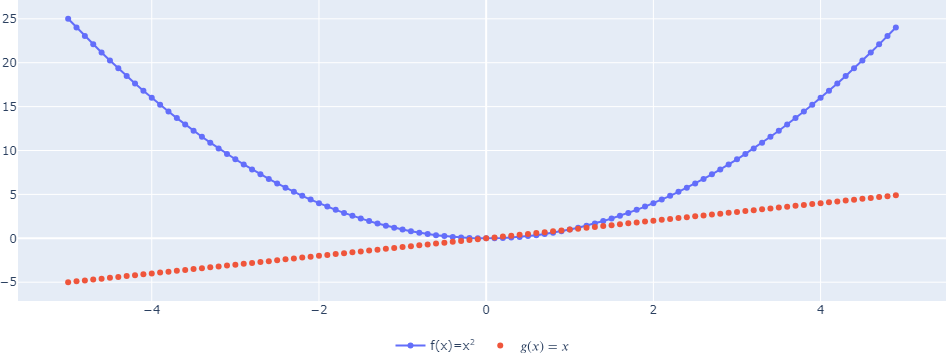

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="x+y")
fig.show()

Как-то недостаточно наглядно, не находите?

Давайте разрешим использовать информацию из всех аргументов и сами зададим шаблон подсказки.

- hoverinfo="all"

- в hovertemplate передаём строку, используем HTML для форматирования, а имена переменных берём в фигурные скобки и выделяем %, например, %{x}

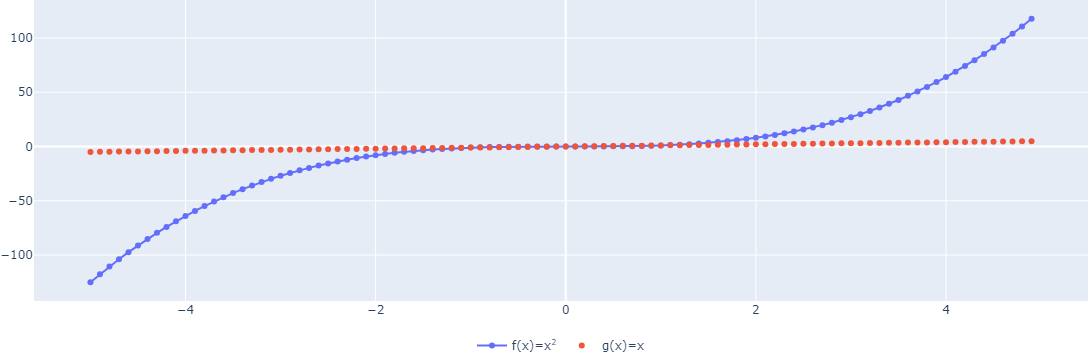

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

А что если мы хотим сравнить информацию на 2 кривых в точках, например, с одинаковых аргументом?

Т.к. это касается всей фигуры, нам нужен update_layout и его аргумент hovermode.

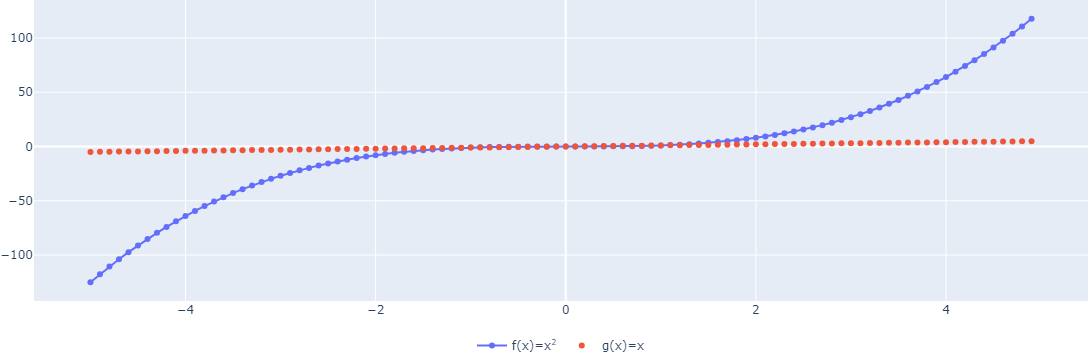

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Кстати, маркерами можно управлять для конкретной кривой и явно.

Для этого используется аргумент marker, который принимает на вход словарь. Подробный пример - https://plotly.com/python/marker-style/

А мы лишь ограничимся баловством:

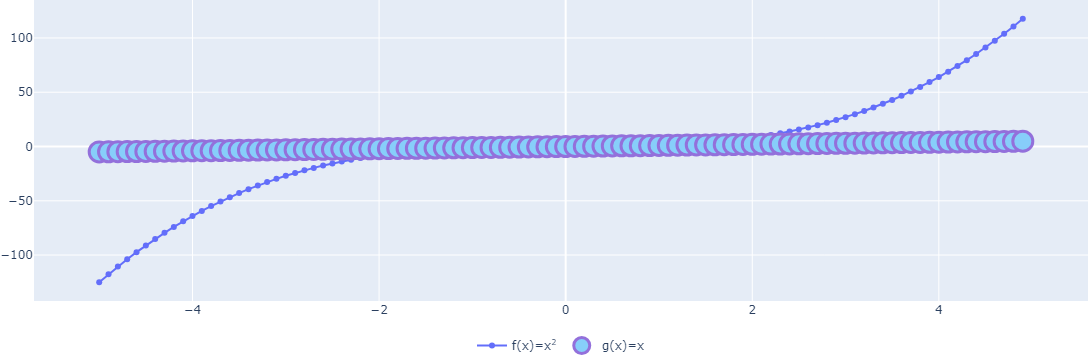

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Кажется теперь на графике плохо видно ту часть, где кривые пересекаются (вероятно наиболее интересную для нас).

Для этого у нас есть методы фигуры:

- update_yaxes - ось Y (вертикаль)
- update_xaxes - ось X (горизонталь)

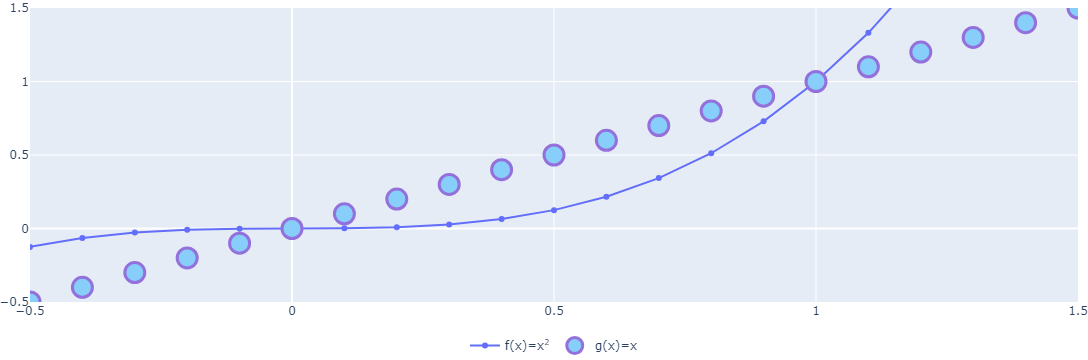

In [22]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Хорошо, но правильно было бы нанести осевые линии.

Для этого у тех же функций есть 3 атрибута:
    
- zeroline - выводить или нет осевую линию

- zerolinewidth - задаёт толщину осевой (в пикселях)

- zerolinecolor - задаёт цвет осевой (строка, можно указать название цвета, можно его код, как принято в HTML разметке - http://htmlbook.ru/css/value/color)



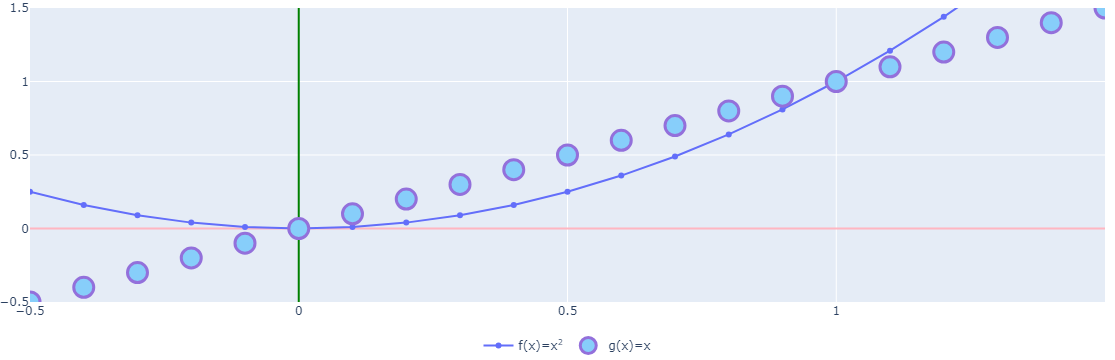

In [69]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Давайте добавим больше разных функций на наш график, но сделаем так, чтобы по умолчанию их не было видно.

Для этого у объекта Scatter есть специальный атрибут:
    
- visible='legendonly'

*Т.к. мы центрировали легенду относительно точки сдвига, то нам не пришлось менять величину сдвига с увеличением числа подписей.*

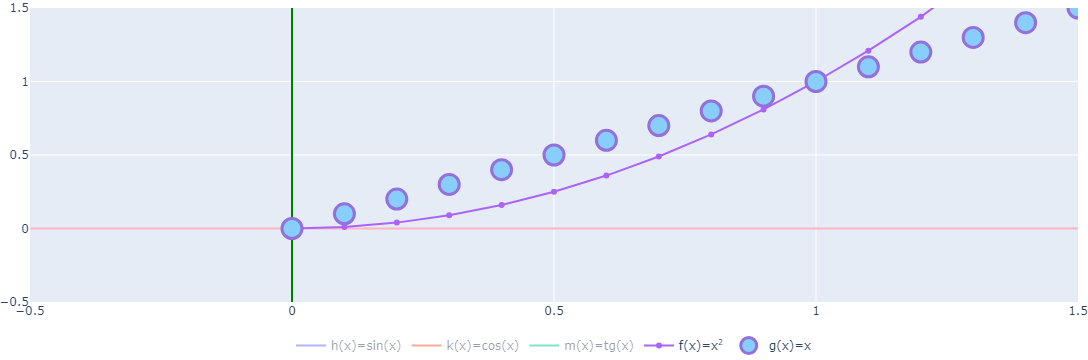

In [21]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)


fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

# Увеличиваем плотность информации

## Тепловая карта

Вернёмся к 1 графику, но постараемся уместить на нём больше информации, используя цветовую кодировку (так называемую тепловую карту - чем выше значение некой величины, тем "теплее" цвет).

Для этого у объекта go.Scatter используем уже знакомый атрибут marker (напомним, он принимает словарь). Передаём следующие атрибуты в словарь:

- color - список значений по которым будут выбираться цвета. Элементов списка должно быть столько же, сколько и точек.

- colorbar - словарь, описывающий индикационную полосу цветов справа от графика. Принимает на вход словарь. Нас интересует пока только 1 значение словаря - title - заголовок полосы.

В предыдущем примере цветовая шкала не очень похожа на тепловую карту.

На самом деле цвета на шкале можно изменить, для этого служит атрибут colorscale, в который передаётся имя палитры.

In [74]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x),  colorscale='Inferno')
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=f(x)))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=x))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

NameError: name 'h' is not defined

Можно ли добавить больше информации? Конечно можно, но тут возникают хитрости.

Для ещё одного измерения можно использовать размер маркеров.

**Важно**. Размер - задаётся в пикселях, т.е. величина не отрицательная (в отличие от цвета), поэтому мы будем использовать модуль одной из функций.

так же, величины меньше 2 пикселей обычно плохо видны на экране, поэтому для размера мы добавим множитель.

Размеры задаётся атрибутом size того же словаря внутри marker. Этот атрибут принимает 1 значение (число), либо список (чисел).

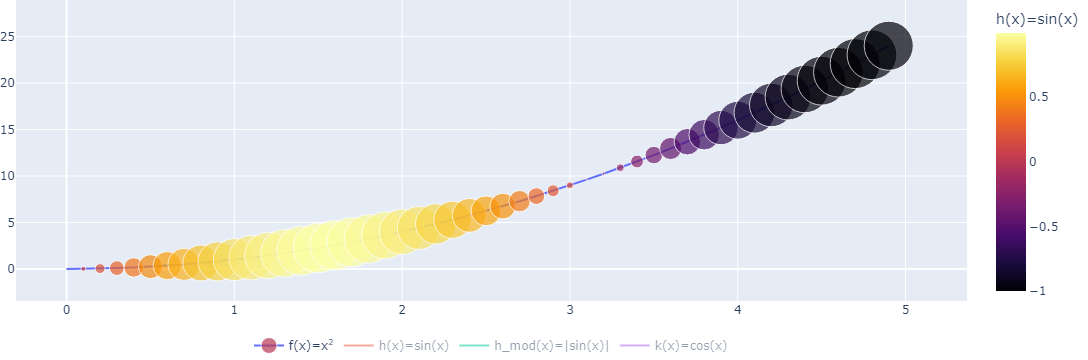

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno',
                                     size=50*abs(h(x)))
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=abs(h(x)),  name='h_mod(x)=|sin(x)|'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

### Философский вопрос - зачем мы так мучаемся, если есть plotly.express?

Документация plotly по анимации https://plotly.com/python/animations/ начинается с феерического примера:

<code>import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
</code>

Действительно, функции Экспресса принимают на вход датафреймы (да, обычные из Pandas), вам лишь нужно указать колонки по которым производится агрегация данных. И можно сразу строить и тепловые карты, и анимации очень небольшим количеством кода, как в этом примере:

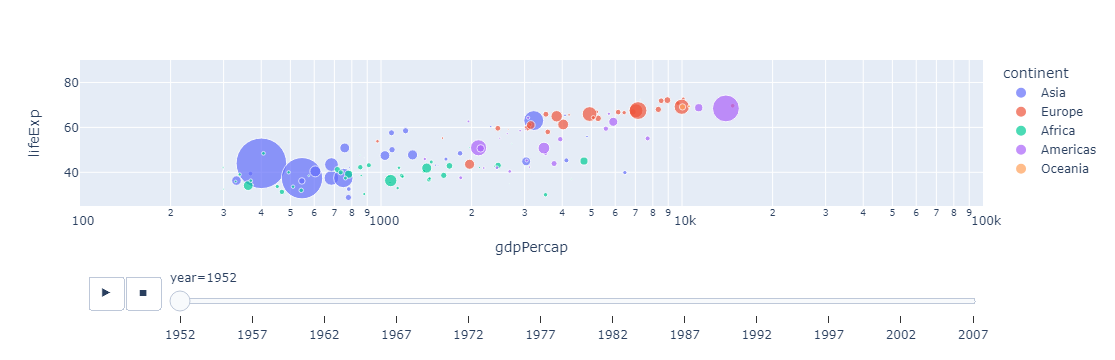

In [75]:
import plotly.express as px

df = px.data.gapminder()

px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Ответ и прост и сложен:
    
1. Стандартные примеры Экспресса могут не удовлетворить ваших потребностей, нужно что-то чуть более сложное и хитрое, например, совместить график и гистограмму. Вручную вы получаете больше гибкости.

2. Понять как сгруппировать и агрегировать данные в датафрейме для такой визуализации порой сложнее, чем просто построить набор картинок для фреймов анимации/слайдера.

Это вполне приличный JSON. Не будем вдаваться в его особенности, хотя легко заметить, что его структура соответствует нашему объекту фигуры, со всеми графиками, фреймами, подложками, кнопками и т.п.

Давайте добавим немного по краям и сложим этот код в файл:

<code>with open('example.JSON', 'w') as file:
    file.write('var graphs = {};'.format(graphJSON))</code>

## Круговые диаграммы

Для полноты картины рассмотрим несколько других способов визуализации данных, кроме линейных графиков. Начнём с <a href="https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0#%D0%9A%D1%80%D1%83%D0%B3%D0%BE%D0%B2%D1%8B%D0%B5_(%D1%81%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5)_%D0%B4%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%8B">круговых диаграмм</a>

Для нашего эксперимента "подбросим" 100 раз пару игральных кубиков (костей) и запишем суммы выпавших очков.

In [77]:
dices = pd.DataFrame(np.random.randint(low=1, high=7, size=(100, 2)), columns=('Кость 1', 'Кость 2'))


dices['Сумма'] = dices['Кость 1'] + dices['Кость 2'] 
# Первые 5 бросков игральных костей
display(dices.head(1000))

sum_counts = dices['Сумма'].value_counts().sort_index()
# количество выпавших сумм
display(sum_counts)

Кость 1  Кость 2  Сумма
0         3        3      6
1         5        6     11
2         3        1      4
3         1        5      6
4         6        4     10
..      ...      ...    ...
95        4        1      5
96        3        1      4
97        3        3      6
98        5        6     11
99        1        1      2

[100 rows x 3 columns]

Сумма
2      5
3      3
4     10
5     11
6     12
7     17
8     13
9     10
10    13
11     6
Name: count, dtype: int64

Для того чтобы создать круговую диаграмму используем go.Pie, который добавляем так же, как мы добавляли график на созданную фигуру. 

Используем 2 основных атрибута:

- values - размер сектора диаграммы, в нашем случае прямо пропорционален количеству той или иной суммы

- labels - подпись сектора, в нашем случае значение суммы. *Если не передать подпись, то в качестве подписи будет взят индекс значения из списка values*

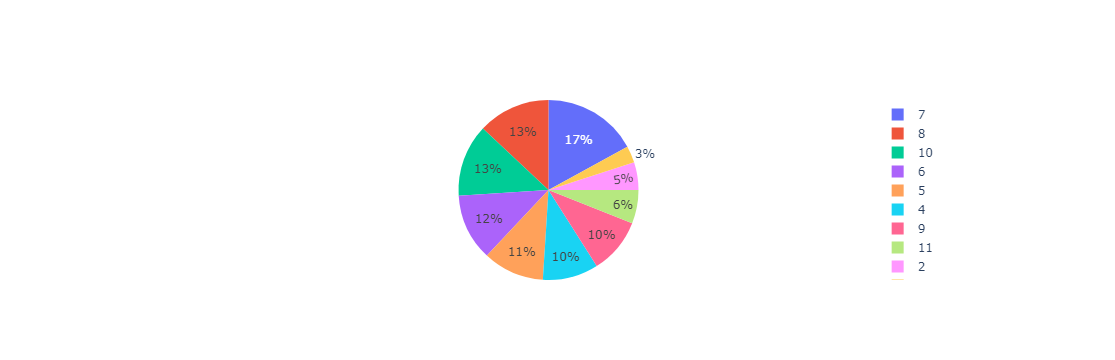

In [78]:
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index))
fig.show()

Сразу бросается в глаза то, что хотя мы передали массив, упорядоченный по индексам, но при построении он был пересортирован по значениям.

Это легко исправить с помощью аргумента

<code>sort = False</code>

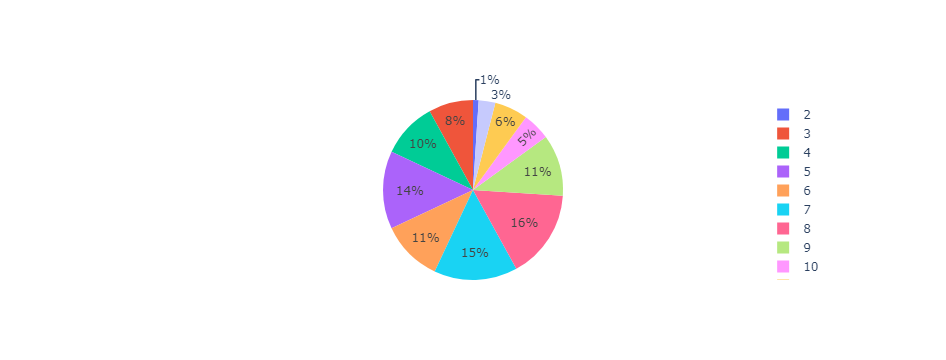

In [30]:
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, sort = False))
fig.show()

Так же при желании мы можем "выдвинуть" один или несколько секторов.

Для этого используем аргумент pull, который принимаем список чисел. Каждое число - доля, на которую надо выдвинуть сектор из круга:

- 0 - не выдвигать

- 1 - 100% радиуса круга

Мы создадим список из нулей, такой же длинны, что массив значений. А потом один элемент увеличим до 0.2.

*Обратите внимание, мы не используем метод idxmax Pandas, т.к. наш массив имеет индексы, соответствующие суммам. А определение какой сектор выдвигать на диаграмме происходит по индексу списка, к которому наш массив приводится.*

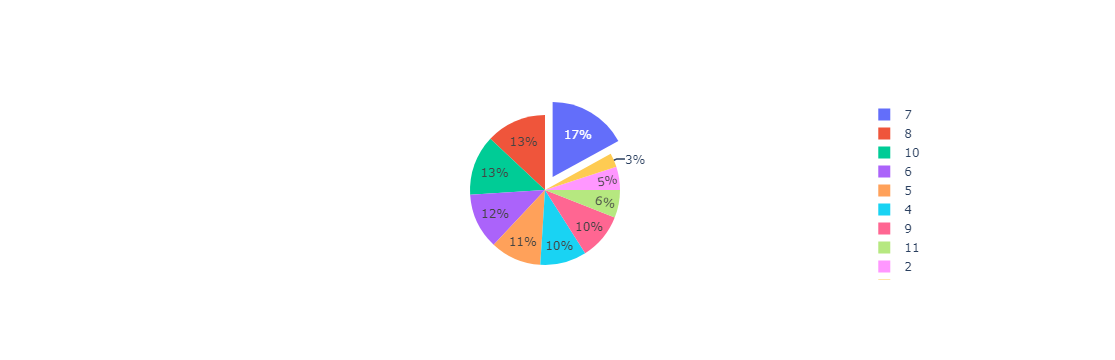

In [79]:
fig = go.Figure()
pull = [0]*len(sum_counts)
pull[sum_counts.tolist().index(sum_counts.max())] = 0.2
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, pull=pull))
fig.show()

Если вам не нравятся классические круговые диаграммы "пирожки", то легко превратить их в "пончики", вырезав сердцевину. Для этого используем аргумент hole, в который передаём число (долю радиуса, которую надо удалить):

- 0 - не вырезать ничего

- 1 - 100% вырезать, ничего не оставить

*Таким образом, значение 0.9 превратит круговую диаграмму в кольцевую.*

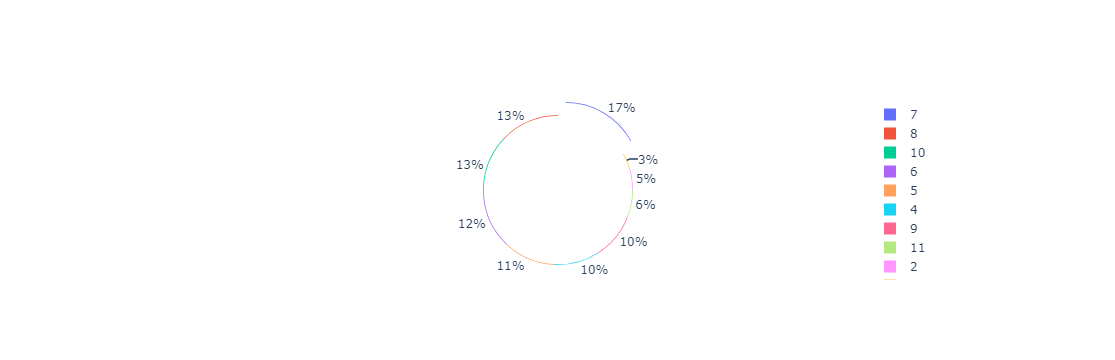

In [83]:
fig = go.Figure()
pull = [0]*len(sum_counts)
pull[sum_counts.tolist().index(sum_counts.max())] = 0.2
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, pull=pull, hole=0.99))
fig.show()

Кстати, образовавшаяся "дырка от бублика" - идеальное место для подписи, которую можно сделать с помощью атрибута annotations слоя.

Не забываем, что аннотаций может быть много, поэтому annotations принимаем список словарей.

Текст аннотации поддерживает HTML разметку (чем мы воспользуемся, задав абсурдно длинный текст, не помещающийся в 1 строку)

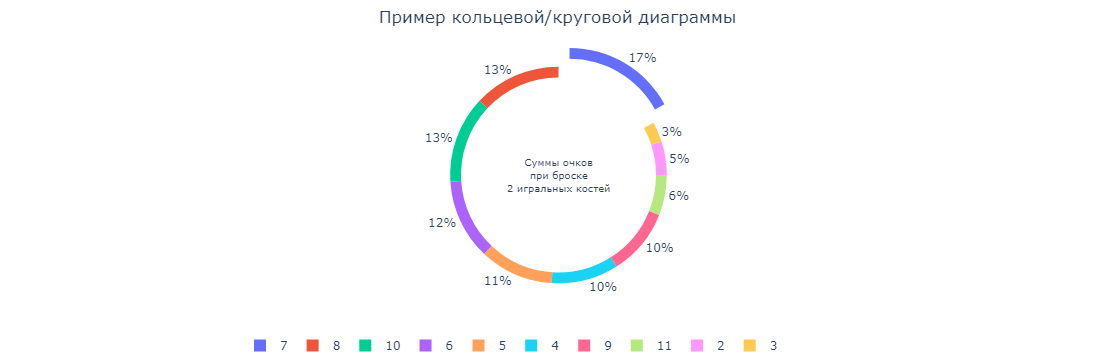

In [85]:
fig = go.Figure()
pull = [0]*len(sum_counts)
pull[sum_counts.tolist().index(sum_counts.max())] = 0.2
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, pull=pull, hole=0.9))

fig.update_layout(
    title="Пример кольцевой/круговой диаграммы",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend_orientation="h",
    annotations=[dict(text='Суммы очков<br>при броске<br>2 игральных костей', x=0.5, y=0.5, font_size=10, showarrow=False)])
fig.show()

Что, если вы хотим детализовать картинку?

## Sunburst или диаграмма "солнечные лучи"

Нам на помощь приходит диаграмма "солнечные лучи" - иерархическая диаграмма на основе круговой. По сути это набор кольцевых диаграмм, нанизанных друг на друга, причём сегменты следующего уровня находятся в пределах границ сегментов своего "родителя" на предыдущем.

Например, получить 8 очков с помощью 2 игральных костей можно несколькими способами:

- 2 + 6

- 3 + 5

- 4 + 4


Для построения диаграммы нам потребуется go.Sunburst и 4 основных аргумента:

- values - значения, задающие долю от круга на диаграмме

- branchvalues="total" - такое значение указывает, что значения родительского элемента являются суммой значений потомков. Это необходимо для того, чтобы составить полный круг на каждом уровне.

- labels - список подписей, которые отображаются на диаграмме

- parents - список подписей родителей, для построения иерархии. Для элементов 0 уровня (без родителей) родителем указывается пустая строка.

Для начала обойдёмся 2 уровнями (все события и суммы)

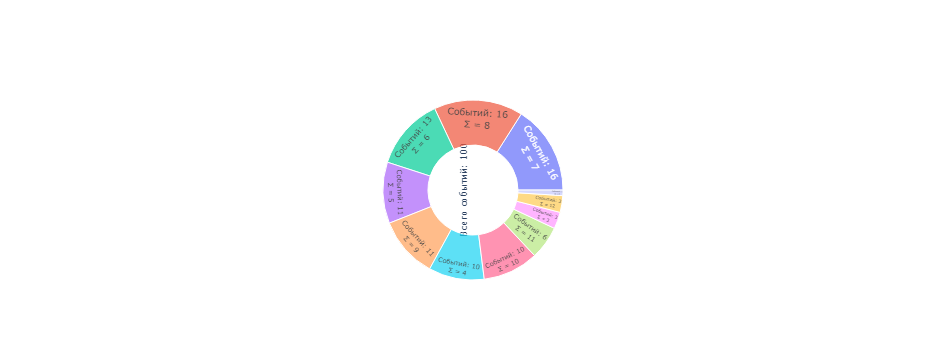

In [60]:
# 1-й уровень, центр диаграммы
labels = ["Всего событий: " + str(sum(sum_counts))]
parents = [""]
values = [sum(sum_counts)]

# 2-й уровень, "лепестки" диаграммы
second_level_dict = {x:'Событий: ' + str(sum_counts[x]) + '<br>Σ = ' + str(x) for x in sum_counts.index}
labels += map(lambda x: second_level_dict[x], sum_counts.index)
parents += [labels[0]]*len(sum_counts)
values += sum_counts.tolist()

fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    branchvalues="total"
))
#fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

А теперь добавим группировку по парам исходов игральных костей и вычисление для таких пар "родителей".

*Конечно, если кости идентичны, то 6+2 и 2+6 - это идентичные исходы, как и пара 3+5 и 5+3, но в рамках следующего примера мы будем считать их разными, просто чтобы не добавлять лишнего кода.*

Так же уменьшим отступы, т.к. подписи получаются уж очень мелкими.

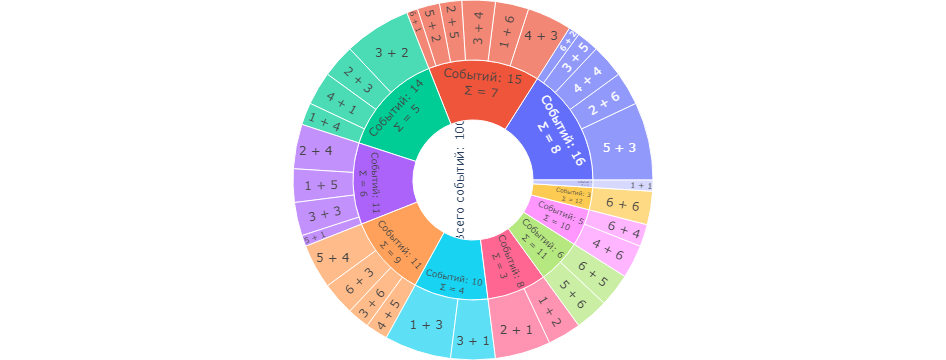

In [34]:
# 1-й уровень, центр диаграммы
labels = ["Всего событий: " + str(sum(sum_counts))]
parents = [""]
values = [sum(sum_counts)]

# 2-й уровень, "промежуточный"
second_level_dict = {x:'Событий: ' + str(sum_counts[x]) + '<br>Σ = ' + str(x) for x in sum_counts.index}
labels += map(lambda x: second_level_dict[x], sum_counts.index)
parents += [labels[0]]*len(sum_counts)
values += sum_counts.tolist()

# Готовим DataFrame для 3 уровня (группируем )
third_level = dices.groupby(['Кость 1', 'Кость 2']).count().reset_index()
third_level.rename(columns={'Сумма':'Value'}, inplace=True)
third_level['Сумма'] = third_level['Кость 1'] + third_level['Кость 2']
third_level['Label'] = third_level['Кость 1'].map(str) + ' + ' + third_level['Кость 2'].map(str)
third_level['Parent'] = third_level['Сумма'].map(lambda x: second_level_dict[x])
# 3-й уровень, "лепестки" диаграммы
values += third_level['Value'].tolist()
parents += third_level['Parent'].tolist()
labels += third_level['Label'].tolist()

fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    branchvalues="total"
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

## Гистограммы

Естественно не круговыми диаграммами едиными, иногда нужны и обычные столбчатые.

Простейшая гистограмма строится с помощью go.Histogram. В качестве единственного аргумента в x передаём список значений, которые участвуют в выборке (Plotly самостоятельно сгруппирует их в столбцы и вычислит высоту), в нашем случае это колонка с суммами.

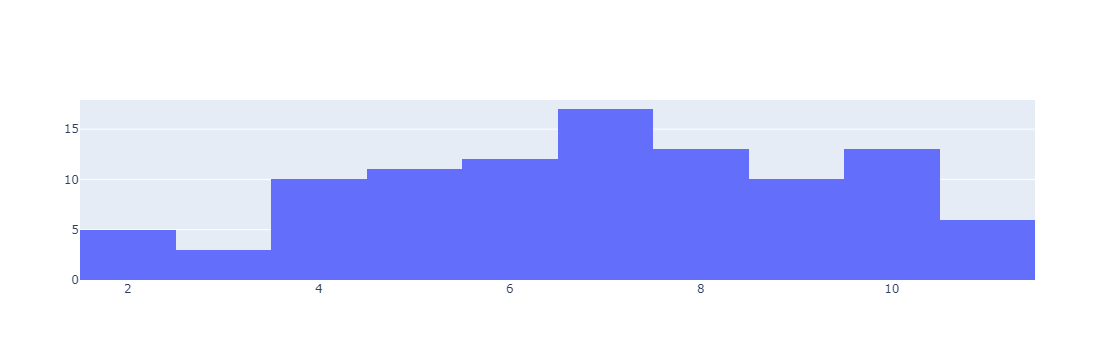

In [86]:
fig = go.Figure(data=[go.Histogram(x=dices['Сумма'])])
fig.show()

Если по какой-то причине нужно построить не вертикальную, а горизонтальную гистограмму, то меняем x на y:

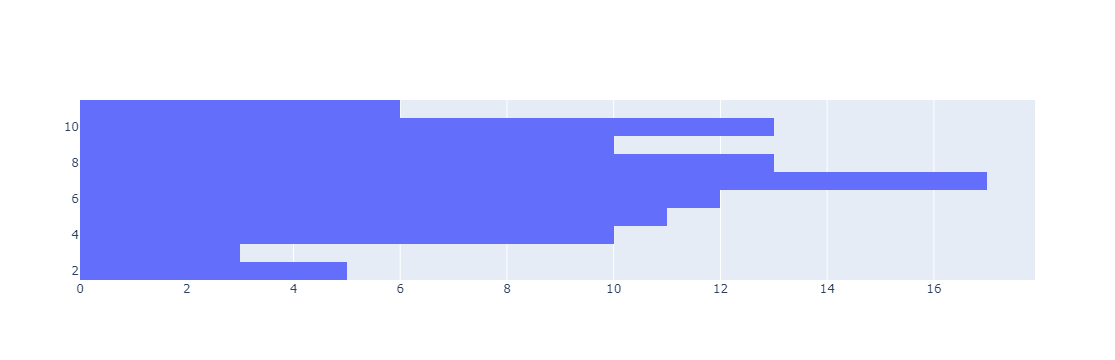

In [87]:
fig = go.Figure(data=[go.Histogram(y=dices['Сумма'])])
fig.show()

А что, если у нас 2 или 3 набора данных и мы хотим их сравнить? Сгенерируем ещё 1100 бросков пар кубиков и просто добавим на фигуру 2 гистограммы:

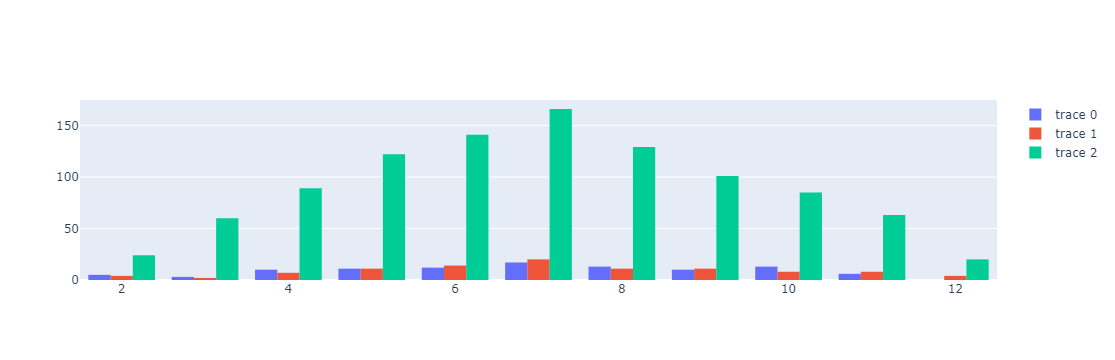

In [88]:
dices2 = pd.DataFrame(np.random.randint(low=1, high=7, size=(100, 2)), columns=('Кость 1', 'Кость 2'))
dices2['Сумма'] = dices2['Кость 1'] + dices2['Кость 2']

dices3 = pd.DataFrame(np.random.randint(low=1, high=7, size=(1000, 2)), columns=('Кость 1', 'Кость 2'))
dices3['Сумма'] = dices3['Кость 1'] + dices3['Кость 2']

fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма']))
fig.add_trace(go.Histogram(x=dices2['Сумма']))
fig.add_trace(go.Histogram(x=dices3['Сумма']))
fig.show()

Все 3 выборки подчиняются одному и тому же распределению, и очевидно, но количество событий сильно отличается, поэтому на нашей гистограмме некоторые столбцы сильно больше других.

Картинку надо "нормализовать". Для этого служит аргумент histnorm.

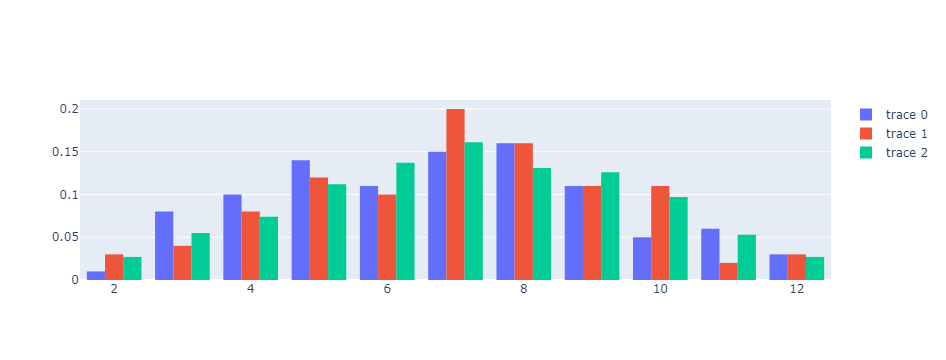

In [38]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма'], histnorm='probability density'))
fig.add_trace(go.Histogram(x=dices2['Сумма'], histnorm='probability density'))
fig.add_trace(go.Histogram(x=dices3['Сумма'], histnorm='probability density'))
fig.show()

Как и предыдущие виды визуализаций, гистограммы могут иметь оформление:
    
- подпись графика, подписи осей

- ориентация и положение легенды.

- отступы

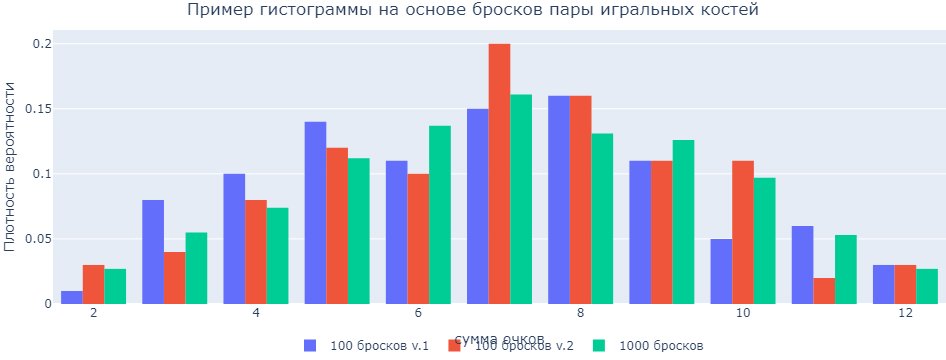

In [39]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма'], histnorm='probability density', name='100 бросков v.1'))
fig.add_trace(go.Histogram(x=dices2['Сумма'], histnorm='probability density', name='100 бросков v.2'))
fig.add_trace(go.Histogram(x=dices3['Сумма'], histnorm='probability density', name='1000 бросков'))
fig.update_layout(
    title="Пример гистограммы на основе бросков пары игральных костей",
    title_x = 0.5,
    xaxis_title="сумма очков",
    yaxis_title="Плотность вероятности",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Другой интересны режим оформления - <code>barmode='overlay'</code> - он позволяет рисовать столбцы гистограммы одни поверх других.

Имеет смысл использовать его одновременно с аргументом <code>opacity</code> самих гистограмм - он задаёт прозрачность гистограммы (от 0 до 100%).

*Однако, большое количество гистограмм в таком случае тяжело визуально интерпретировать, поэтому мы скроем одну.*

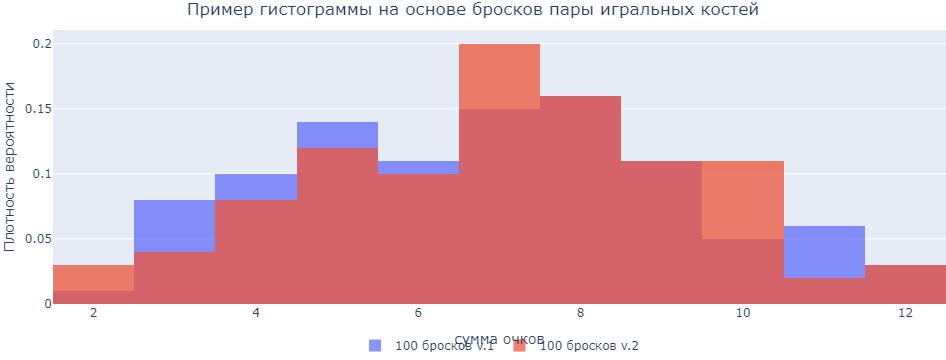

In [40]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма'], histnorm='probability density', opacity=0.75, name='100 бросков v.1'))
fig.add_trace(go.Histogram(x=dices2['Сумма'], histnorm='probability density', opacity=0.75, name='100 бросков v.2'))
#fig.add_trace(go.Histogram(x=dices3['Сумма'], histnorm='probability density', opacity=0.75, name='1000 бросков'))
fig.update_layout(
    title="Пример гистограммы на основе бросков пары игральных костей",
    title_x = 0.5,
    xaxis_title="сумма очков",
    yaxis_title="Плотность вероятности",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    barmode='overlay',
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Если мы говорим о вероятности, то имеет так же смысл построить и накопительную гистограмму. Например, вероятности выпадения не менее чем X очков на сумме из 2 игральных костей.

Для этого используется аргумент гистограммы <code>cumulative_enabled=True</code>

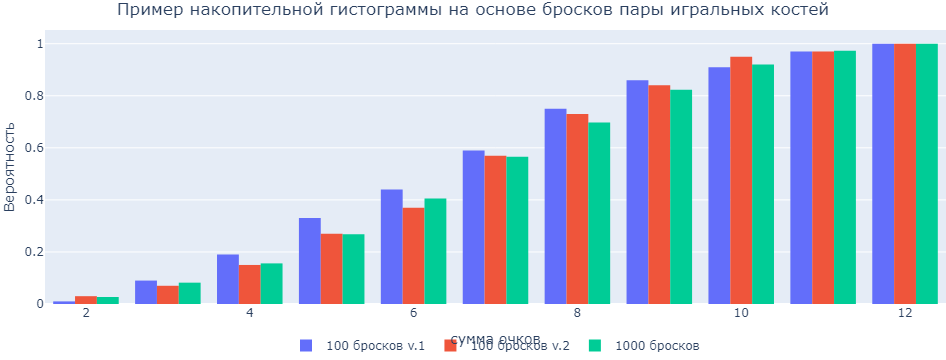

In [41]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dices['Сумма'], histnorm='probability density', cumulative_enabled=True, name='100 бросков v.1'))
fig.add_trace(go.Histogram(x=dices2['Сумма'], histnorm='probability density', cumulative_enabled=True, name='100 бросков v.2'))
fig.add_trace(go.Histogram(x=dices3['Сумма'], histnorm='probability density', cumulative_enabled=True, name='1000 бросков'))
fig.update_layout(
    title="Пример накопительной гистограммы на основе бросков пары игральных костей",
    title_x = 0.5,
    xaxis_title="сумма очков",
    yaxis_title="Вероятность",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Так же весьма полезно то, что на одной фигуре можно совмещать график, построенный по точкам (go.Scatter) и гистограмму (go.Histogram).

Для демонстрации такого применения, давайте сгенерируем 1000 событий из другого распределения - нормального. Для него легко построить теоретическую кривую. Мы возьмём для этого готовые функции из модуля scipy:

- scipy.stats.norm.rvs - для генерации событий

- scipy.stats.norm.pdf - для получения теоретический функции распределения

*В качестве начального и конечного значений аргумента (x) возьмём границы интервала в 3σ*

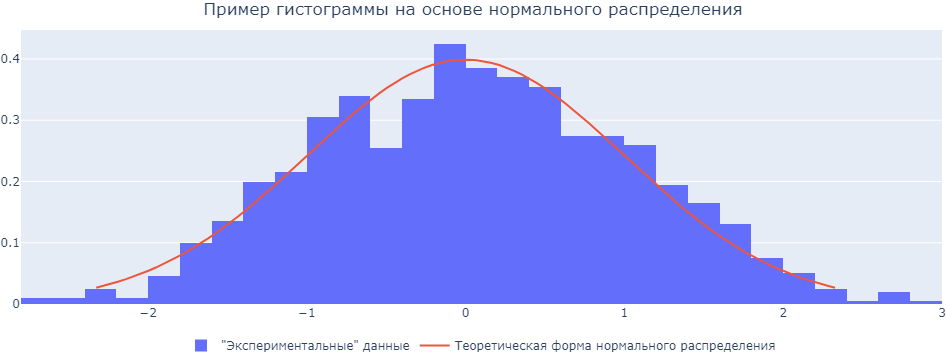

In [45]:
from scipy.stats import norm

r = norm.rvs(size=1000)

x_norm = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

fig = go.Figure()
fig.add_trace(go.Histogram(x=r, histnorm='probability density', name='"Экспериментальные" данные'))
fig.add_trace(go.Scatter(x=x_norm, y=norm.pdf(x_norm), name='Теоретическая форма нормального распределения'))
fig.update_layout(
    title="Пример гистограммы на основе нормального распределения",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Этот пример так же демонстрирует как происходит объединение в столбцы, если величина не дискретная.

В данном случае каждый столбец тем выше, чем больше значений попало в интервал, соответствующий ширине этого столбца.

В свою очередь это означает, что при необходимости мы можем регулировать количество столбцов и их ширину (это 2 взаимосвязанных параметра).


- Вариант 1 - задав ширину столбца - <code>xbins={"size":0.1}</code>

- Вариант 2 - задав количество столбцов - <code>nbinsx=200</code>

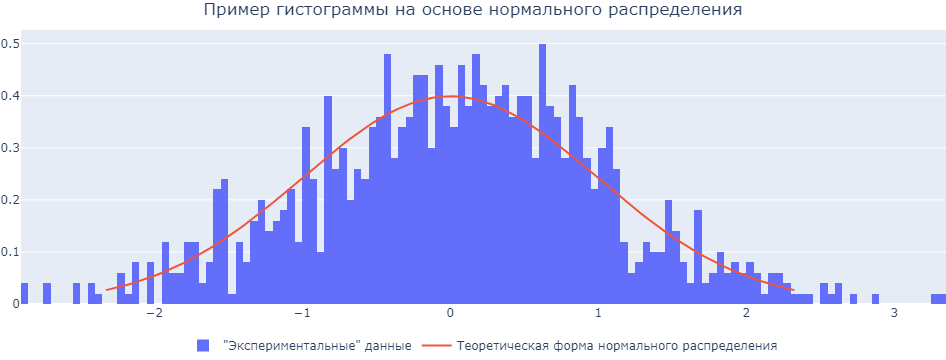

In [70]:
fig = go.Figure()
fig.add_trace(go.Histogram(nbinsx=200,
                           x=r, histnorm='probability density', name='"Экспериментальные" данные'))
fig.add_trace(go.Scatter(x=x_norm, y=norm.pdf(x_norm), name='Теоретическая форма нормального распределения'))
fig.update_layout(
    title="Пример гистограммы на основе нормального распределения",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

## Другие столбчатые диаграммы - Bar Charts

Столбчатые диаграммы можно сформировать и своими силами, если сгруппировать данные и вычислить высоты столбцов.

Далее, используя класс go.Bar передаём названия столбцов и их величины в 2 аргумента:

- x - подписи

- y - величины



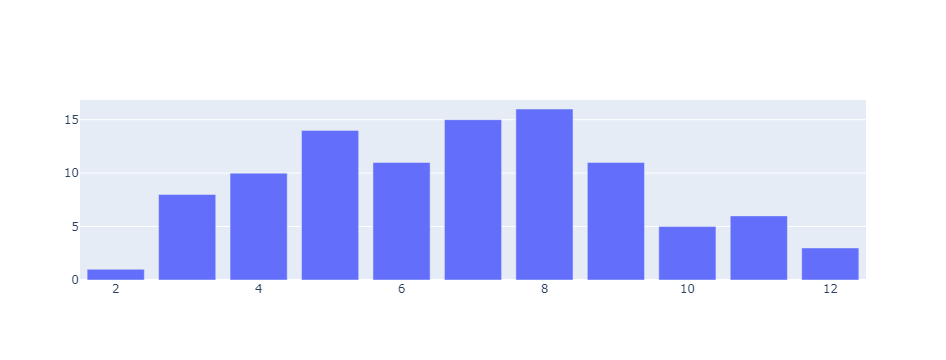

In [43]:
d_grouped = dices.groupby(['Сумма']).count()

labels = d_grouped.index
values = d_grouped['Кость 1'].values

fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.show()

**<span style="color:red">Важно!</span>**

Как и круговая диаграмма, такая столбчатая в отличие от ранее изученных гистограмм не построит столбец для того, чего нет!

Например, если мы сделаем только 10 бросков по 2 кости, то среди них не может выпасть всех возможных случаев. А значит, они не отобразятся на диаграмме:

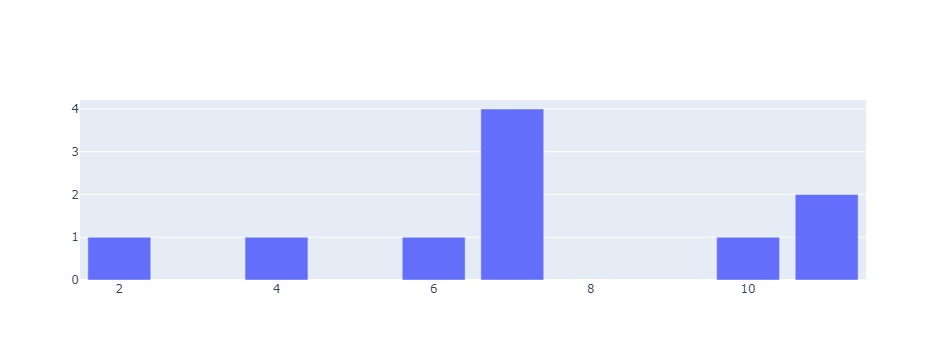

In [72]:
BAD_d_grouped = dices.head(10).groupby(['Сумма']).count()

labels = BAD_d_grouped.index
values = BAD_d_grouped['Кость 1'].values

fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.show()

При необходимости выведения ВСЕХ, даже нулевых столбцов, их следует сформировать самостоятельно.

## Ящики с усами (Box Plots)

А что, если требуется более сложный и информативный инструмент? Примером может служить диаграмма размаха или "ящик с усами" (https://habr.com/ru/post/267123/)

Для примера создадим набор 100 событий с бросками набора других игральных костей. На этот раз 3 4-гранных кости (3d4). Это могло бы быть сравнением 2 игровых мечей с уроном 2d6 и 3d4, однако, любому очевидно, что второй эффективнее (разброс 2-12 против разброса 3-12). Вся ли это информация, которую можно "вытащить" из этих данных?

Конечно нет, ведь у них будут отличаться и меры центральной тенденции (медианы или средние).

Для построения ящиков с усами мы используем класс go.Box. Данные (весь массив "сумм") передаём в единственный аргумент - y.

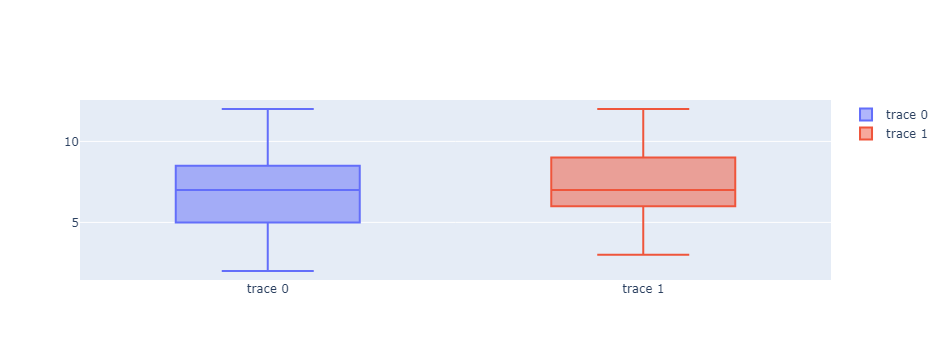

In [46]:
dices4 = pd.DataFrame(np.random.randint(low=1, high=5, size=(100, 3)), columns=('Кость 1', 'Кость 2', 'Кость 4'))
dices4['Сумма'] = dices4['Кость 1'] + dices4['Кость 2'] + dices4['Кость 4']

fig = go.Figure()
fig.add_trace(go.Box(y=dices['Сумма']))
fig.add_trace(go.Box(y=dices4['Сумма']))
fig.show()

Не совсем понятно кто есть кто.

*Примечание. Т.к. мы используем random, то в вашем случае результат может получиться не такой, как у меня при тестовой генерации, однако забавно, что с первой же попытки во время подготовки этого материала я получил вот такую картинку:*

![](https://habrastorage.org/webt/q6/kj/va/q6kjva_tuw3jkyrk7gqbw9pvnow.png)

*Тут ясно, что "усы" левого ящика имеют размах 2-12, значит, это и есть 2d6. Но занятно, что хотя нижняя граница прямого "усы" выше левого, но и верхняя ниже! Это объясняется тем, что 100 событий не так уж и много, а выбросить сразу 3 четвёрки довольно сложно. И медианы у них на одном уровне. Выходит, наше первоначальное предположение о большей эффективности оружия с уроном 3d4 можно считать справедливым лишь по уровню 25% квартиля - он явно выше на правой картинке. Т.е. "ящик с усами" всё же дал нам довольно много легко считываемой и не совсем очевидной первоначально информации.*

Однако, как и для других фигур, тут можно задать подписи.

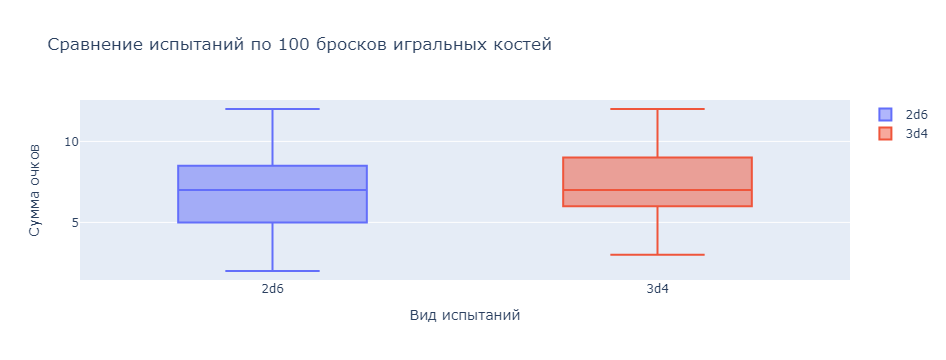

In [47]:
fig = go.Figure()
fig.add_trace(go.Box(y=dices['Сумма'], name='2d6'))
fig.add_trace(go.Box(y=dices4['Сумма'], name='3d4'))
fig.update_layout(title="Сравнение испытаний по 100 бросков игральных костей",
                  xaxis_title="Вид испытаний",
                  yaxis_title="Cумма очков")
fig.show()

Иногда вертикальные ящики не очень наглядны (либо сложно прочитать подписи снизу), тогда их можно положить "на бок" так же, как мы делали с обычными столбчатыми диаграммами:

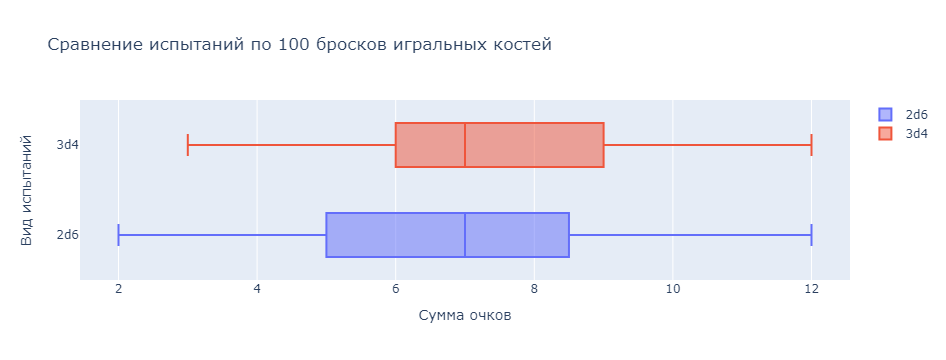

In [48]:
fig = go.Figure()
fig.add_trace(go.Box(x=dices['Сумма'], name='2d6'))
fig.add_trace(go.Box(x=dices4['Сумма'], name='3d4'))
fig.update_layout(title="Сравнение испытаний по 100 бросков игральных костей",
                  yaxis_title="Вид испытаний",
                  xaxis_title="Cумма очков")
fig.show()

Иногда полезно для каждого ящика с усами так же отобразить облако точек, формирующий распределение. Это легко сделать с помощью аргумента <code>boxpoints='all'</code>

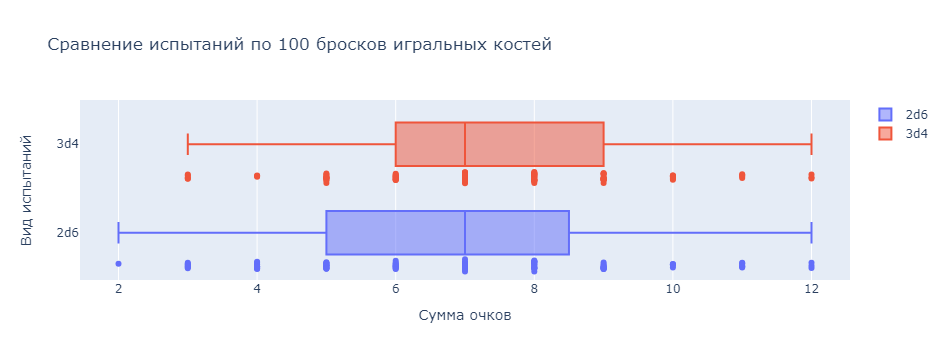

In [49]:
fig = go.Figure()
fig.add_trace(go.Box(x=dices['Сумма'], name='2d6', boxpoints='all'))
fig.add_trace(go.Box(x=dices4['Сумма'], name='3d4', boxpoints='all'))
fig.update_layout(title="Сравнение испытаний по 100 бросков игральных костей",
                  yaxis_title="Вид испытаний",
                  xaxis_title="Cумма очков")
fig.show()

## Географические карты

Plotly поддерживает великое множество разных видов визуализаций, охватить все из которых в одном обзоре довольно трудно (и бессмысленно, т.к. общие принципы будут схожи с ранее показанными)

Полезно будет в завершении лишь показать один из наиболее красивых на мой взгляд "графиков" - Scattermapbox - геокарты.

Для этого возьмём CSV с 1117 населёнными пунктами РФ и их координатами (файл создан на основе https://github.com/hflabs/city/blob/master/city.csv) - 'https://raw.githubusercontent.com/hflabs/city/master/city.csv.

Воспользуемся классом go.Scattermapbox и 2 атрибутами:

- lat (широта)

- lon (долгота)

Так же нам понадобится подключить OSM карту, т.к. Scattermapbox может работать с разными видами карт:

<code>fig.update_layout(mapbox_style="open-street-map")</code>

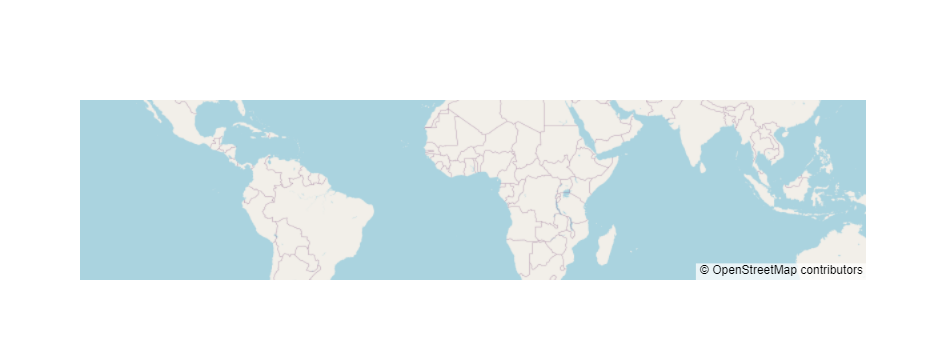

In [50]:
cities = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Как-то криво, правда?
Давайте сдвинем центр карты так, чтобы он пришёлся на столицу нашей родины (вернее столицу родины автора этих строк, т.к. у читателя родина может быть иной).

Для этого нам понадобится объект go.layout.mapbox.Center или обычный словарь с 2 аргументами:

- lat

- lon

Этот объект/словарь мы передаём в качестве значения аргумента center словаря внутрь mapbox:

<code>fig.update_layout(
    mapbox=dict(
        center=dict(
            lat=...,
            lon=...
        )
    )
)</code>

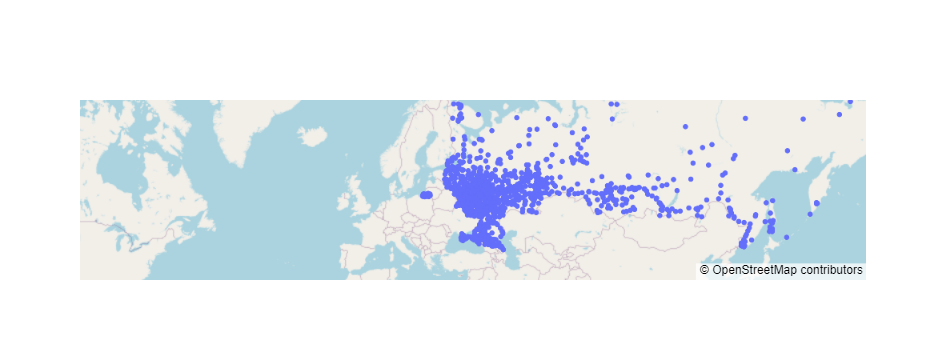

In [51]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
# Аналог с помощью словаря
#map_center =                   dict(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center))
fig.show()

Неплохо, но масштаб мелковат (по сути сейчас отображается карта мира на которой 1/6 часть суши занимает далеко не всё полезное место).

Без ущерба для полезной информации можно слегка приблизить картинку.

Для этого используем аргумент <code>zoom=2</code>

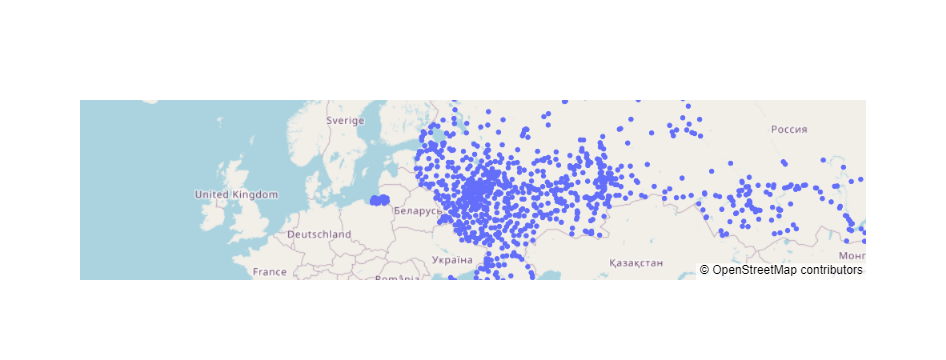

In [86]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

*Увы, на карту попало слишком много Европы без данных и слишком мало отечественного дальнего востока, так что в данном случае центрироваться возможно стоит по геометрическому центру страны (вычислим его весьма "приблизительно").*

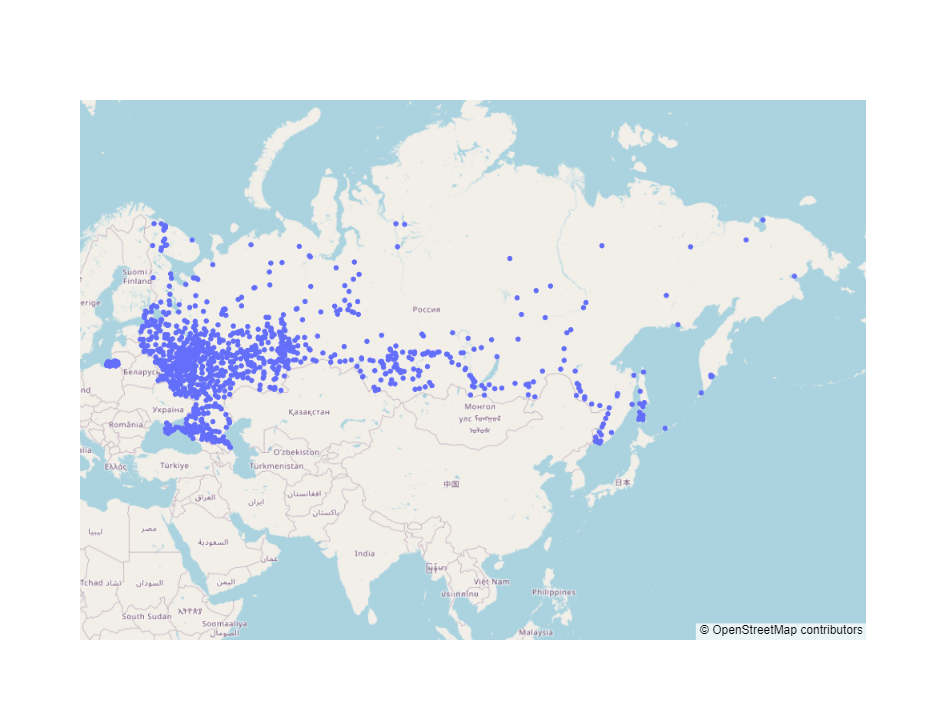

In [87]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))

map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

Давайте добавим подписи городов. Для этого используем аргумент <code>text</code>.

*Следует заметить, что для нескольких населённых пунктов (города федерального значения) почему-то не заполнено поле city, поэтому для них мы его вручную заполним из address. Не очень красиво, но главное, что не пустота.*

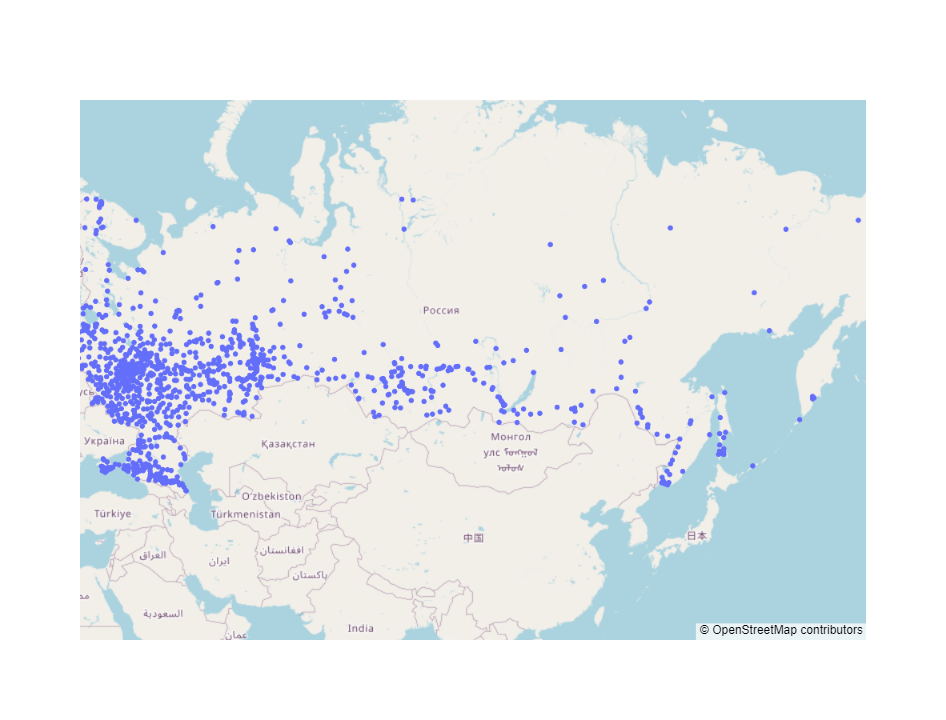

In [88]:
cities.loc[cities['city'].isna(), 'city'] = cities.loc[cities['city'].isna(), 'address']

fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon'], text=cities['city']))
map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

Вспомним, как мы увеличивали плотность информации для обычных графиков. Тут так же можно задать размер маркера, например, от населения.

Следует учесть 2 момента:

1. Данные замусорены. Население некоторых городов имеет вид 96[3]. Поэтому колонка с население не численная и нам нужна функция, которая этот мусор обнулит, либо приведёт к какому-то читаемому виду.

2. Размер маркера задаётся в пикселях. И 15 миллионов пикселей - слишком большой диаметр. Потому разумно придумать формулу, например, логарифм.